In [102]:
from simulation import *
from aesthetics import *
from scipy import stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Methionine 1 CA-CB-CG-SD

# Import the data

This is just a short snippet from the first trajectory.

In [5]:
prefix = '/home/dslochower/data/projects/nonequilibrium/'
data = np.genfromtxt(prefix + '/md-data/adenylate-kinase/md-setup/apo-4ake/analysis/dihedral-test.dat')

## Let's do our standard unwrapping of the torsional data

This follows from the exploratory analysis we've done for butane

In [101]:
distances = np.diff(data[:, 1])
flips = np.where(distances > 100)[0] # Where the torsion goes from negative to positive, so we subtract 360 for displacement
flops = np.where(distances < -100)[0] # Where the torsion goes from negative to positive, so we add 360 for displacement

# These should be reasonably close for a torsion in a flat potential
print('{} ?=? {}'.format(len(flips), len(flops))) 

unwrapped_data = np.copy(data)
for subtraction in flips: 
    unwrapped_data[subtraction + 1:, 1] -= 360
for addition in flops: 
    unwrapped_data[addition + 1:, 1] += 360

309 ?=? 310


## Time series of the dihedral

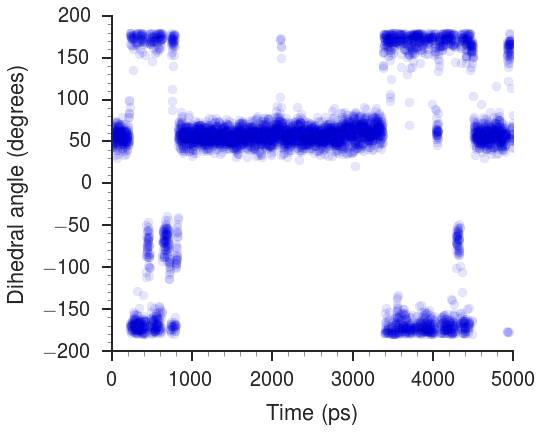

In [126]:
fig, ax2 = plt.subplots(1, 1, figsize=(6 * 1.2, 6))
ax2.scatter([i for i in range(len(data[:, 1]))], data[:, 1], s=80, alpha=0.1, edgecolor=None)
ax2.set_ylabel(r'Dihedral angle (degrees)')
ax2.set_xlabel('Time (ps)')
ax2.set_xlim([0, 5000])
aesthetics.paper_plot(fig)

## Step sizes

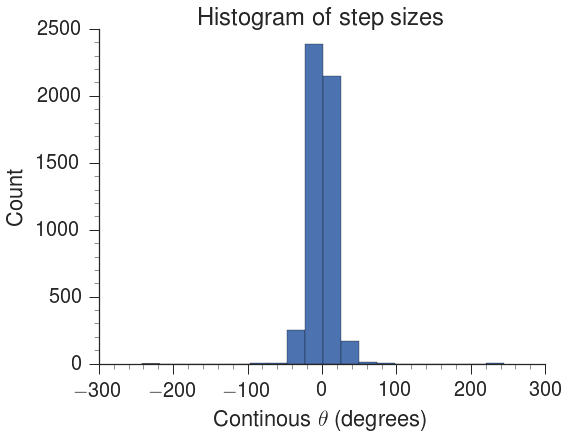

In [104]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

ax1.hist(np.diff(unwrapped_data[:, 1]), bins=20)
ax1.set_ylabel('Count')
ax1.set_xlabel(r'Continous $\theta$ (degrees)')
ax1.set_title('Histogram of step sizes')
pretty_plot(fig)

Now, ignoring the big changes, how big are the usual steps?

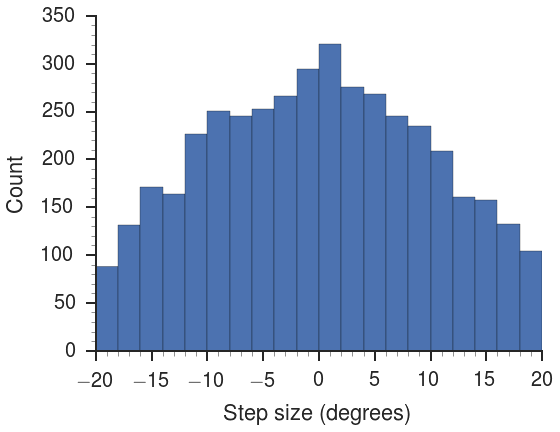

In [11]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

ax1.hist(np.diff(unwrapped_data[:, 1]), bins=20, range=(-20, 20))
ax1.set_ylabel('Count')
ax1.set_xlabel(r'Step size (degrees)')
#ax1.set_title('Histogram of step sizes')
aesthetics.paper_plot(fig)

## How about convergence of the distribution?

## Let's write a quick loop to call `cpptraj` on an increasing number of trajectories

These loops have to run in the same directory as the trajectories, which is the not current organization. They also probably write the scripts to the current working directory and need to moved to the correct location, but it gets the job done.

In [23]:
for number_trajectories in range(1, 70):
    file =  open('dihedral-average-{}-trajectories.in'.format(number_trajectories), 'w')    
    print('parm full-protein.prmtop', file=file)
    for trajectory in range(1, number_trajectories + 1):
        print('trajin traj.{:04d}.nc'.format(trajectory), file=file)
    print('dihedral cccc :1@CA :1@CB :1@CG :1@SD', file=file)
    print('run', file=file)
    print('writedata dihedral-average-{}-trajectories.dat cccc'.format(number_trajectories), file=file)
    print('quit', file=file)
    file.close()

In [123]:
file =  open('dihedral-average-trajectories.sh', 'w')    
print('source $AMBERHOME/amber.sh', file=file)
for number_trajectories in range(1, 70):
    print('cpptraj -i dihedral-average-{}-trajectories.in'.format(number_trajectories), file=file)
file.close()

## A quick snippet to grab the final distribution

In [45]:
number_trajectories = 100
file =  open('dihedral-average-{}-trajectories.in'.format(number_trajectories), 'w')    
print('parm full-protein.prmtop', file=file)
for trajectory in range(1, number_trajectories + 1):
    print('trajin traj.{:04d}.nc'.format(trajectory), file=file)
print('dihedral cccc :1@CA :1@CB :1@CG :1@SD', file=file)
print('run', file=file)
print('writedata dihedral-average-{}-trajectories.dat cccc'.format(number_trajectories), file=file)
print('quit', file=file)
file.close()

file =  open('dihedral-average-trajectories.sh', 'w')    
print('source $AMBERHOME/amber.sh', file=file)
print('cpptraj -i dihedral-average-{}-trajectories.in'.format(number_trajectories), file=file)
file.close()


In [47]:
number_trajectories = 100
datum = np.genfromtxt(prefix + '/md-data/adenylate-kinase/md-setup/apo-4ake/analysis/dihedral-average-{}-trajectories.dat'.format(number_trajectories))
print(np.mean(datum[:,  1]))
histum, bin_edges = np.histogram(datum[:, 1], range=(-180, 180), bins=60, normed=True)
final_distribution = histum

45.1800615995


In [26]:
prefix = '/home/dslochower/data/projects/nonequilibrium/'
hist = np.empty((70, 60))
for number_trajectories in range(1, 70):
    datum = np.genfromtxt(prefix + '/md-data/adenylate-kinase/md-setup/apo-4ake/analysis/dihedral-average-{}-trajectories.dat'.format(number_trajectories))
    print(np.mean(datum[:,  1]))
    histum, bin_edges = np.histogram(datum[:, 1], range=(-180, 180), bins=60, normed=True)
    hist[number_trajectories - 1] = histum

36.30099564
18.08582216
17.7978261533
17.661715065
13.446084104
11.3162421367
15.5148505543
20.60905328
22.2418033911
23.015168566
22.9791215364
25.642960745
26.4392183831
27.9798460729
29.439963684
30.9893398037
31.2260916447
32.6627765078
33.8817686505
34.98525299
35.5910597286
34.8920977391
35.8562301617
36.5337112492
36.8342313328
36.4039170315
36.9667349926
37.6491888593
37.2565687338
35.4172702487
36.0472963561
36.4215139019
36.9630673455
37.4079313165
37.8927530183
38.1569528856
38.6013260622
39.0036121426
39.3962033303
39.790708081
40.0825608444
40.4124205662
40.3686186121
40.74134381
41.0992983302
41.4280593457
41.7019345477
41.8767463696
42.1093420273
42.187961714
42.4182793973
42.6833509546
42.8904413728
43.1267711007
43.3204631756
43.5160599486
43.6841582305
43.8443294293
44.2058925224
44.360919498
44.5286813416
44.6885989077
44.7899218543
44.568072295
44.7469899545
44.9452183467
45.013518486
44.6348767574
44.774610818


## Plot the distribution up to 700 ns

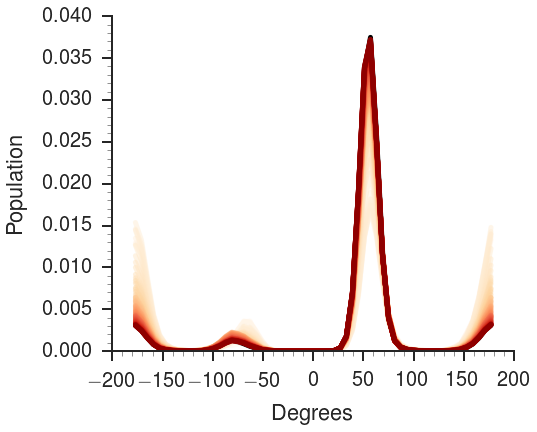

In [49]:
mids = bin_edges[1:] - np.diff(bin_edges)/2
fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2, 6))
c = sns.color_palette("OrRd", 70)
for number_trajectories in range(0, 69):
    ax1.plot(mids, hist[number_trajectories], label='Mean {} ns'.format((number_trajectories + 1)*10), color=c[number_trajectories],
            alpha=0.5) 
ax1.plot(mids, final_distribution, color='k', zorder=-2)
ax1.set_ylabel('Population')
ax1.set_xlabel(r'Degrees')
# ax1.set_title('Histogram of positions for 1 methionine CA-CB-CG-SD dihedral', y=1.05)
# ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
aesthetics.paper_plot(fig)

## Plot residuals up to 700 ns relative to 1 us

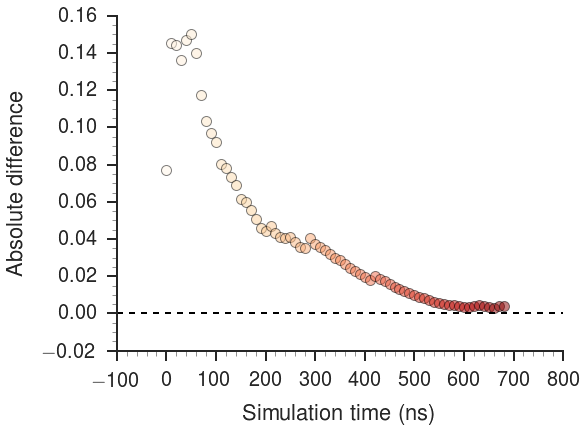

In [99]:
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))
c = sns.color_palette("OrRd", 70)
for number_trajectories in range(0, 69):
    ax1.scatter(number_trajectories * 10, 
                np.sum([abs(final_distribution[i] - hist[number_trajectories][i]) for i in range(len(final_distribution))]),
               marker = 'o', edgecolor = 'k', linewidth = 1.0, alpha=0.5, color=c[number_trajectories], s=100)
ax1.axhline(y=0, ls='--', lw=2, c='k')
ax1.set_ylabel('Absolute difference')
ax1.set_xlabel(r'Simulation time (ns)')
aesthetics.paper_plot(fig)